## SMS Spam Collection Dataset


In [1]:
import nltk 


In [36]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> all
Command 'all' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> all
Command 'all' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_data...
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Un


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [5]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip >> smsspamcollection.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  198k  100  198k    0     0   157k      0  0:00:01  0:00:01 --:--:--  157k


In [6]:
!unzip smsspamcollection.zip

Archive:  smsspamcollection.zip
warning [smsspamcollection.zip]:  203415 extra bytes at beginning or within zipfile
  (attempting to process anyway)
  inflating: SMSSpamCollection       
  inflating: readme                  


In [7]:
!ls


readme	sample_data  SMSSpamCollection	smsspamcollection.zip


In [8]:
!head SMSSpamCollection

ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
ham	Ok lar... Joking wif u oni...
spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
ham	U dun say so early hor... U c already then say...
ham	Nah I don't think he goes to usf, he lives around here though
spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
ham	Even my brother is not like to speak with me. They treat me like aids patent.
ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
spam	H

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'text'])

In [11]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [14]:
df.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

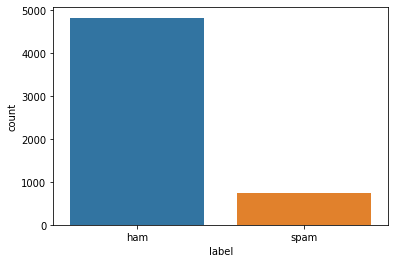

In [17]:
sns.countplot(x=df['label'])

## Feature Engineering


In [22]:
df['length'] = df['text'].apply(len)

In [23]:
df.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


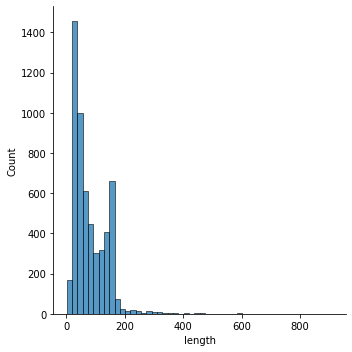

In [25]:
sns.displot(df['length'], bins=50)

In [26]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [32]:
print(df[df['length'] == 910]['text'].iloc[0])

For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..


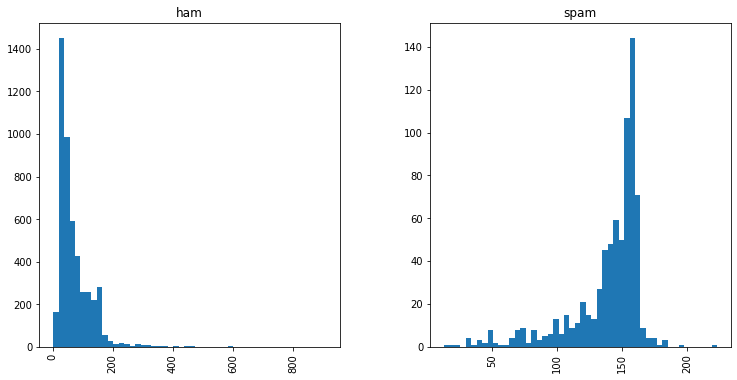

In [33]:
df.hist(column='length', by='label', bins=50, figsize=(12, 6));

In [44]:
from nltk.corpus import stopwords
import string

In [45]:
stopwords.words('english')[1:10]

['me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [46]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

## Make a function for text pre-processing

In [54]:
def text_processing(text):
  # remove punctuation

  remove_punc = [c for c in text if c not in string.punctuation]

  # join caracters into a text

  remove_punc = ''.join(remove_punc)

  # remove stop words

  return [w for w in remove_punc.split() if w.lower() not in stopwords.words('english')]

In [55]:
df.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [56]:
df['text'].apply(text_processing)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, U, £750, Pou...
5568                   [ü, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: text, Length: 5572, dtype: object

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
cv_transformer = CountVectorizer(analyzer=text_processing)
cv_transformer.fit(df['text'])

CountVectorizer(analyzer=<function text_processing at 0x7f5e5b06e5e0>)

In [59]:
len(cv_transformer.vocabulary_)

11425

In [67]:
text_2 = df['text'][2]

In [68]:
text_2

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [69]:
bow_0 = cv_transformer.transform([text_2])

In [70]:
print(bow_0)
print(bow_0.shape)


  (0, 73)	1
  (0, 423)	1
  (0, 430)	1
  (0, 443)	1
  (0, 871)	1
  (0, 1551)	1
  (0, 1833)	2
  (0, 1941)	1
  (0, 2804)	1
  (0, 3953)	1
  (0, 4731)	1
  (0, 5619)	1
  (0, 6331)	2
  (0, 6557)	1
  (0, 9159)	1
  (0, 9200)	1
  (0, 9252)	1
  (0, 10512)	1
  (0, 10686)	1
  (0, 11084)	1
  (0, 11123)	1
(1, 11425)


In [74]:
cv_transformer.get_feature_names()[1833]

'FA'

In [76]:
text_messages_bow = cv_transformer.transform(df['text'])

## TF-IDF

In [77]:
from sklearn.feature_extraction.text import TfidfTransformer

In [78]:
tfidf_transformer = TfidfTransformer()

In [79]:
tfidf_transformer.fit(text_messages_bow)

TfidfTransformer()

In [80]:
tfidf_0 = tfidf_transformer.transform(bow_0)

In [82]:
print(tfidf_0)

  (0, 11123)	0.19104387220509106
  (0, 11084)	0.15898145347176754
  (0, 10686)	0.13995540820792943
  (0, 10512)	0.2118842499614227
  (0, 9252)	0.16121646071144807
  (0, 9200)	0.22538631044314436
  (0, 9159)	0.22538631044314436
  (0, 6557)	0.18466951562322612
  (0, 6331)	0.347904654589528
  (0, 5619)	0.1887440015250524
  (0, 4731)	0.16452475271486866
  (0, 3953)	0.1544015632869991
  (0, 2804)	0.17524194104333074
  (0, 1941)	0.1526581729225716
  (0, 1833)	0.4507726208862887
  (0, 1551)	0.2177823443125605
  (0, 871)	0.2118842499614227
  (0, 443)	0.2177823443125605
  (0, 430)	0.2177823443125605
  (0, 423)	0.09639170919810956
  (0, 73)	0.22538631044314436


In [83]:
cv_transformer.get_feature_names()[423]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


'2'

In [86]:
print(tfidf_transformer.idf_[cv_transformer.vocabulary_['think']])

4.863514852771781


In [88]:
text_tfidf = tfidf_transformer.transform(text_messages_bow)

In [89]:
text_tfidf.shape

(5572, 11425)

## NLP and Naive Bayes Model
Pipelines

In [90]:
from sklearn.naive_bayes import MultinomialNB

In [92]:
nb = MultinomialNB()
nb.fit(text_tfidf, df['label'])

MultinomialNB()

In [93]:
pred = nb.predict(tfidf_0)[0]
expected = df['label'][2]

In [94]:
print(f'Predicted Value: {pred}\nExpected Value: {expected}')

Predicted Value: spam
Expected Value: spam


## Model Evaluation

In [95]:
all_pred = nb.predict(text_tfidf)

In [96]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [97]:
from sklearn.metrics import classification_report

In [98]:
print(classification_report(df['label'], all_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



## But we don't predict on the entire dataset, so we need to split the dataset to training and testing parts

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.33, random_state=42)

## Making a pipline

In [101]:
from sklearn.pipeline import Pipeline

In [102]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_processing)), #Strings to tokens
    ('tf-idf', TfidfTransformer()), #TF-IDF scores
    ('classification', MultinomialNB()) #Train model using TF-IDF with Naive Bayes
])

In [103]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_processing at 0x7f5e5b06e5e0>)),
                ('tf-idf', TfidfTransformer()),
                ('classification', MultinomialNB())])

In [104]:
predictions = pipeline.predict(X_test)

In [105]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1593
        spam       1.00      0.74      0.85       246

    accuracy                           0.96      1839
   macro avg       0.98      0.87      0.91      1839
weighted avg       0.97      0.96      0.96      1839

